In [51]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import xlrd

In [52]:
workbook = xlrd.open_workbook('C:/Users/campo/projet_dep/lucas_excel_3.xlsx')
SheetNameList = workbook.sheet_names()
#SheetNameList = excel_percentage
worksheet = workbook.sheet_by_name(SheetNameList[0])
#j'ai directement modifié les chiffres sur le fichier xlsx en les pondérant
num_rows = worksheet.nrows 
num_cells = worksheet.ncols 
#print( 'num_rows, num_cells', num_rows, num_cells )

In [53]:
# Comment lire l'excel
curr_row = 0
while curr_row < num_rows:
    row = worksheet.row(curr_row)
    """
    print row, len(row), row[0], row[1]
    print( 'Row: ', curr_row )
    print('regarde')
    print(row)
    print( row, len(row), row[0] )
    """
    curr_cell = 0
    while curr_cell < num_cells:
        # Cell Types: 0=Empty, 1=Text, 2=Number, 3=Date, 4=Boolean, 5=Error, 6=Blank
        cell_type = worksheet.cell_type(curr_row, curr_cell)
        cell_value = worksheet.cell_value(curr_row, curr_cell)
        # print( ' ', cell_type, ':', cell_value )
        curr_cell += 1
    curr_row += 1

In [54]:
# On veut créer une matrice avec les lignes : les différents critères et les colonnes : les différentes années
M=[]
criteria = []
i = 0
while i < 13 :
    # on ajoute la ligne en cours dans la liste
    ligne = []
    curr_row = i
    row = worksheet.row(curr_row)
    curr_cell = 0
    while curr_cell < num_cells:
        cell_value = worksheet.cell_value(curr_row, curr_cell)
        if type(cell_value) == float :
            ligne.append(round(cell_value,4))
        else :
            ligne.append(cell_value)
        curr_cell += 1
    if i>0:
        criteria.append(str(ligne[0]))
    M.append(ligne[1:])
    i += 1

In [55]:
#print(M)
#print(dates)
# M est bien la matrice voulue

date = M[0]

data = pd.DataFrame(columns=[date], index = criteria)
for i in range (12):
    data.loc[criteria[i], date] = M[i+1][0:]
    
print(data)
print(data.shape) 
# la on centre et scale les data, pour que la moyenne soit 0 et que la standard deviation soit 1. 
# Il faut qu'on transpose parce qu'il faut des lignes plutôt que des colonnes pour les scaler
scaled_data = preprocessing.scale (data.T)   
# création de l'objet PCA
pca = PCA()
# maths de la pca (calcul des loading scores et des variations)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
# on calcule le pourcentage de variation de chaque composante principale
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
# on crée les labels pour plotter
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
# on utilise matplotlib pour faire le bazar

                                                   1.0     2.0     3.0    \
Food and non-alcoholic beverages                  0.0022  0.0027  0.0021   
Alcoholic beverages and tobacco                   0.0002  0.0001  0.0002   
Clothing and footwear                            -0.0002 -0.0004  0.0002   
Housing, water, electricity, gas and other fuels  0.0089  0.0099  0.0102   
Furniture, lighting equipment, appliances etc.         0  0.0002  0.0002   
Health                                            0.0004  0.0003  0.0003   
Transport                                         0.0047  0.0054  0.0054   
Communication                                    -0.0008 -0.0009 -0.0009   
Recreation, entertainment and culture            -0.0001 -0.0007 -0.0005   
Education                                         0.0001  0.0001  0.0001   
Restaurant and accommodation services             0.0005  0.0006  0.0006   
Miscellaneous goods and services                   0.001  0.0018  0.0016   

           

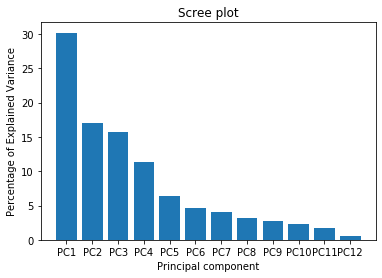

In [56]:
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()

Housing, water, electricity, gas and other fuels   -0.459626
Transport                                          -0.447821
Restaurant and accommodation services               0.416904
Communication                                       0.356169
Food and non-alcoholic beverages                   -0.296235
Recreation, entertainment and culture               0.288359
Clothing and footwear                              -0.201746
Furniture, lighting equipment, appliances etc.      0.161759
Education                                           0.154263
Alcoholic beverages and tobacco                     0.122515
dtype: float64


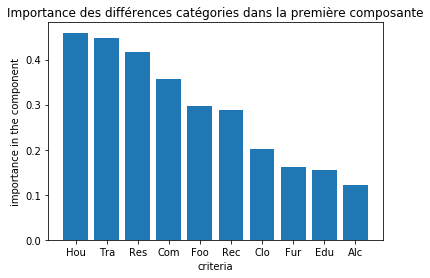

In [57]:
"""
pca_df = pd.DataFrame(pca_data, index=[date], columns = labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index :
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()
"""

loading_scores = pd.Series(pca.components_[0], index=criteria)
# ensuite on trie les loading scores selon leur magnitude (= valeur absolue)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
# ensuite on récupère le top 5 des gènes
top_10_genes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_genes])
Abs = []
for i in range (10):
    s = top_10_genes[i]
    l = [i for i in s]
    Abs.append(l[0]+l[1]+l[2])
L = []
for i in range (10):
    L.append(sorted_loading_scores[top_10_genes][i])
plt.bar(x = range(10), height = L, tick_label = Abs)
plt.ylabel('importance in the component')
plt.xlabel('criteria')
plt.title('Importance des différences catégories dans la première composante')
plt.show()

Health                                             -0.592521
Furniture, lighting equipment, appliances etc.      0.523450
Food and non-alcoholic beverages                    0.415264
Housing, water, electricity, gas and other fuels    0.208507
Clothing and footwear                               0.197002
Recreation, entertainment and culture               0.185724
Restaurant and accommodation services               0.163048
Miscellaneous goods and services                    0.149899
Education                                           0.134617
Alcoholic beverages and tobacco                    -0.115377
dtype: float64


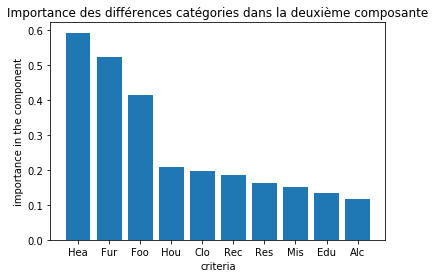

In [58]:
loading_scores = pd.Series(pca.components_[1], index=criteria)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_genes])
Abs = []
for i in range (10):
    s = top_10_genes[i]
    l = [i for i in s]
    Abs.append(l[0]+l[1]+l[2])
L = []
for i in range (10):
    L.append(sorted_loading_scores[top_10_genes][i])
plt.bar(x = range(10), height = L, tick_label = Abs)
plt.ylabel('importance in the component')
plt.xlabel('criteria')
plt.title('Importance des différences catégories dans la deuxième composante')
plt.show()

Education                                         0.542845
Alcoholic beverages and tobacco                  -0.526229
Clothing and footwear                            -0.325774
Miscellaneous goods and services                  0.322066
Restaurant and accommodation services            -0.222375
Health                                           -0.210306
Recreation, entertainment and culture            -0.199295
Furniture, lighting equipment, appliances etc.   -0.198029
Food and non-alcoholic beverages                 -0.153316
Communication                                    -0.117515
dtype: float64


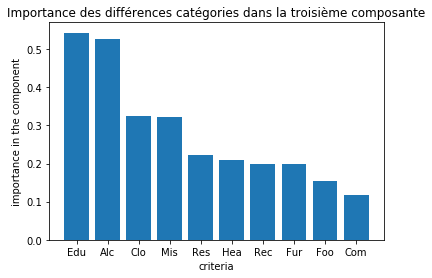

In [59]:
loading_scores = pd.Series(pca.components_[2], index=criteria)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_genes])
Abs = []
for i in range (10):
    s = top_10_genes[i]
    l = [i for i in s]
    Abs.append(l[0]+l[1]+l[2])
L = []
for i in range (10):
    L.append(sorted_loading_scores[top_10_genes][i])
plt.bar(x = range(10), height = L, tick_label = Abs)
plt.ylabel('importance in the component')
plt.xlabel('criteria')
plt.title('Importance des différences catégories dans la troisième composante')
plt.show()

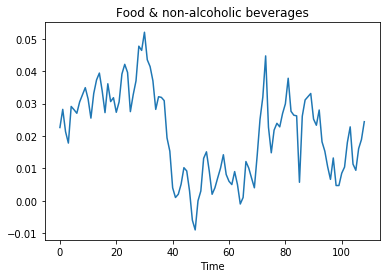

In [50]:
#la on voudrait plot les différentes courbes (transports, housing, communication, food, restauration)
AxAbs = []
for i in range (109):
    AxAbs.append(i)
plt.plot(AxAbs,M[1])
plt.title("Food & non-alcoholic beverages")
plt.xlabel("Time")
plt.show()

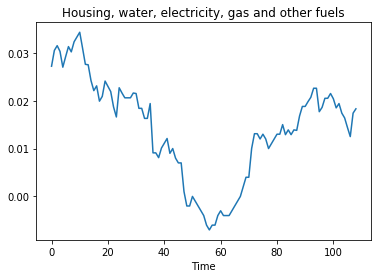

In [47]:
plt.plot(AxAbs,M[4])
plt.title("Housing, water, electricity, gas and other fuels")
plt.xlabel("Time")
plt.show()

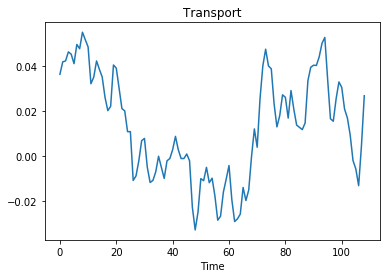

In [48]:
plt.plot(AxAbs,M[7])
plt.title("Transport")
plt.xlabel("Time")
plt.show()

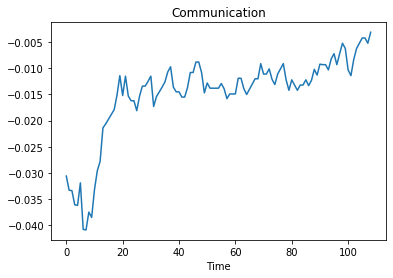

In [49]:
plt.plot(AxAbs,M[8])
plt.title("Communication")
plt.xlabel("Time")
plt.show()

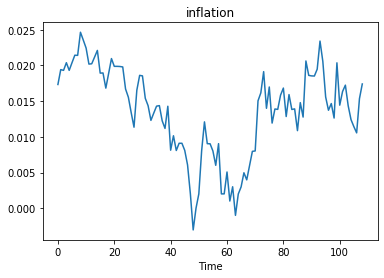

In [70]:
#la on veut plot l'inflation grâce aux 4 critères
Inf = []
for i in range(109):
    Inf.append(worksheet.cell_value(13,i+1))
plt.plot(AxAbs, Inf)
plt.title("inflation")
plt.xlabel("Time")
plt.show()